# Validation of MCFM output

MCFM does not (originally) support a per-event output. Modifications/additions to the source code have been made to save out for each event:

- Incoming/outgoing parton momenta.
- Event weight resulting from the matrix element (squared), parton distribution function, and importance sampling effects.
- Matrix element(s) (SM and BSM hypotheses).

In [53]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [54]:
def plot_hist(vals, *, xbins=(0.0,1.0,100), xlabel='', ylabel=''):
  plt.hist(vals, bins=np.arange(xbins[0], xbins[1], xbins[2]))
  plt.xlim(xbins[0], xbins[1])
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.show()

def sum_partons(df, qty='E', partons=[3,4,5,6]):
  return np.sum([df[f'p{i}_{qty}'] for i in partons], axis=0)

In [55]:
csv_filepath = {
  'ggZZ_box' : '/raven/u/taepa/hstar/data/samples/ggZZ_box/events.csv',
  'ggZZ_all' : '/raven/u/taepa/hstar/data/samples/ggZZ_all/events.csv',
  'gghZZ_hpi' : '/raven/u/taepa/hstar/data/samples/gghZZ_hpi/events.csv',
  'gghZZ_int' : '/raven/u/taepa/hstar/data/samples/gghZZ_int/events.csv',
  'gghZZ_sig' : '/raven/u/taepa/hstar/data/samples/gghZZ_sig/events.csv'
}


In [56]:
sm = 'gghZZ_sig'
df = pd.read_csv(csv_filepath[sm], nrows=1e6)
df.head()

,evtnum,p1_px,p1_py,p1_pz,p1_E,p2_px,p2_py,p2_pz,p2_E,p3_px,...,p4_E,p5_px,p5_py,p5_pz,p5_E,p6_px,p6_py,p6_pz,p6_E,wt
0,0,0.0,0.0,-22.446663,-22.446663,0.0,0.0,397.453521,-397.453521,-10.285929,...,190.046292,44.939206,13.277863,-66.457949,81.317236,-42.884399,-8.485573,-79.154713,90.424251,0.000005
1,1,0.0,0.0,-80.258699,-80.258699,0.0,0.0,158.676952,-158.676952,-53.701088,...,54.237691,44.561798,-16.081030,37.106987,60.177088,-30.370034,-17.881387,-19.362285,40.211703,0.000008
2,2,0.0,0.0,-220.839110,-220.839110,0.0,0.0,241.470398,-241.470398,74.826075,...,40.535013,6.938449,-41.540539,28.712803,50.972380,-71.064437,-15.406592,154.749936,170.982631,0.000010
3,3,0.0,0.0,-92.707361,-92.707361,0.0,0.0,209.354648,-209.354648,40.064385,...,60.214470,1.397447,-40.628110,64.523003,76.261485,-1.610910,-22.938091,-31.608677,39.087843,0.000014
4,4,0.0,0.0,-87.472901,-87.472901,0.0,0.0,168.304555,-168.304555,-20.653192,...,70.998572,31.519070,-50.545104,-72.441553,93.787195,-36.855723,16.349104,-44.224243,59.844976,0.000010


## $\sum_{g} E_g = \sum_{\ell} E_\ell$
By convention, the energies of incoming (outgoing) partons are negative (positive). Hence the bkg sum of the energies of all partons in the energy should add up to zero. 

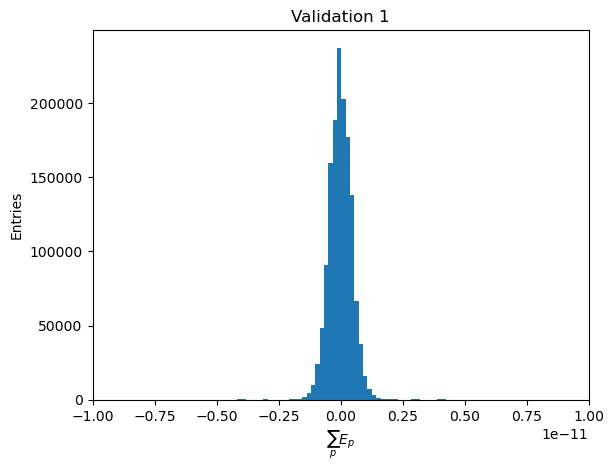

In [57]:
sumE = np.sum([df['p1_E'], df['p2_E'], df['p3_E'], df['p4_E'], df['p5_E'], df['p6_E']], axis=0)
plt.hist(sumE, bins=100)
plt.xlim(-1e-11, 1e-11)
plt.title('Validation 1')
plt.xlabel('$\sum_p E_p$')
plt.ylabel('Entries')
plt.show()

## $m_\ell = 0$
The mass squared values can come out as negative up to numerical precision.

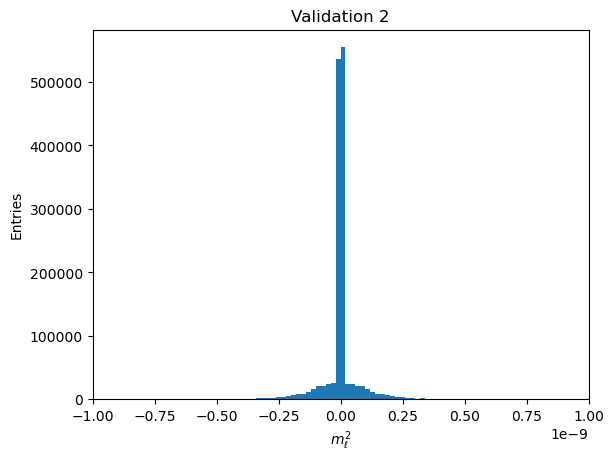

In [58]:
for i in range(3,7):
  df[f'p{i}_m2'] = df[f'p{i}_E']**2-df[f'p{i}_px']**2-df[f'p{i}_py']**2-df[f'p{i}_pz']**2

plt.hist(df['p3_m2'], bins=np.arange(-1e-9,1e-9,2e-11))
plt.xlim(-1e-9, 1e-9)
plt.title('Validation 2')
plt.xlabel('$m^2_\ell$')
plt.ylabel('Entries')
plt.show()

## Lepton $p_{\mathrm{T}}, \eta$ distributions
- Leading: $p_{\mathrm{T}} > 20\,\mathrm{GeV}$
- Subleading: $p_{\mathrm{T}} > 15\,\mathrm{GeV}$
- Subleading: $p_{\mathrm{T}} > 10\,\mathrm{GeV}$
- Subleading: $p_{\mathrm{T}} > 7\,\mathrm{GeV}$
- All: $|\eta| < 2.4$

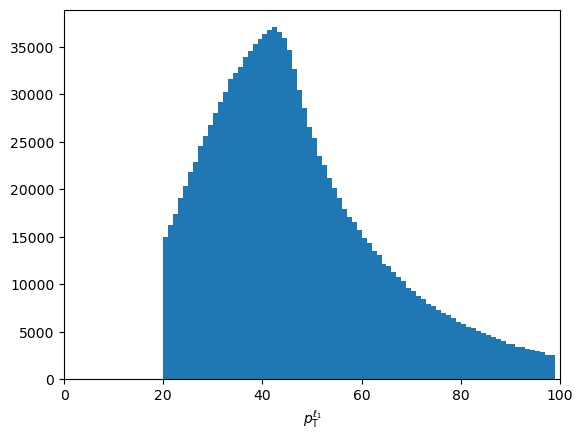

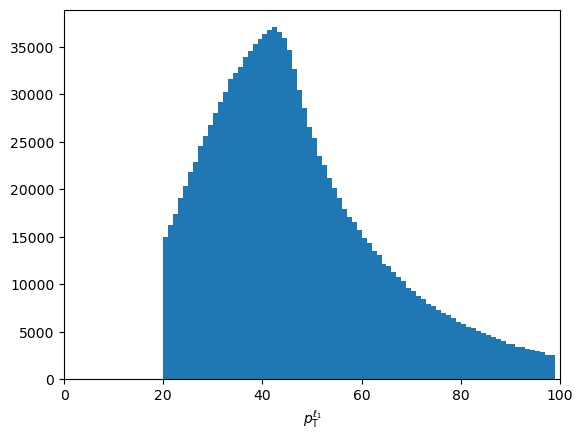

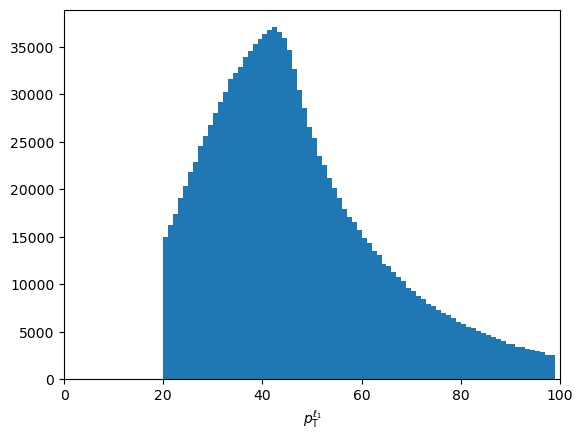

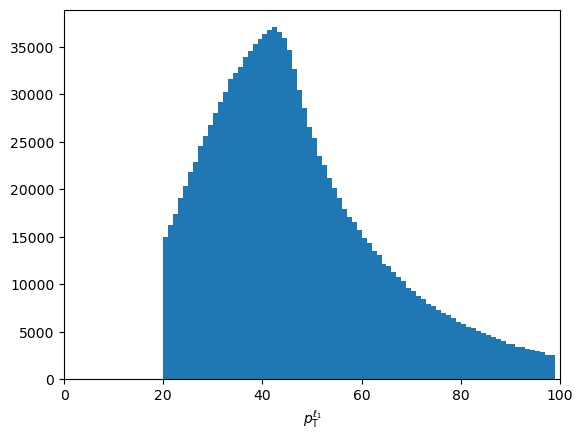

In [59]:
for i in range(3,7):
  df[f'p{i}_pT'] = np.sqrt(df[f'p{i}_px']**2+df[f'p{i}_py']**2)
  plot_hist(df['p3_pT'],xbins=(0.0,100.0,1),xlabel='$p_{\mathrm{T}}^{\ell_1}$')

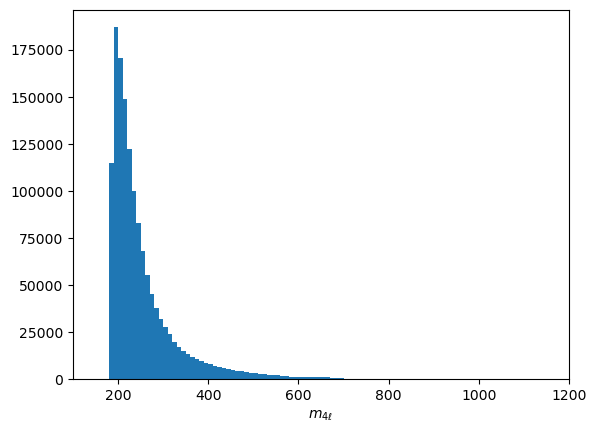

In [60]:
def sum_4l(df,qty):
  return np.sum([df[f'p{i}_{qty}'] for i in range(3,7)], axis=0)

df['m4l'] = np.sqrt(sum_4l(df,'E')**2 - sum_4l(df,'px')**2 - sum_4l(df,'py')**2 - sum_4l(df,'pz')**2)
plot_hist(df['m4l'], xbins=(100.0,1200.0,10.0), xlabel='$m_{4\ell}$')

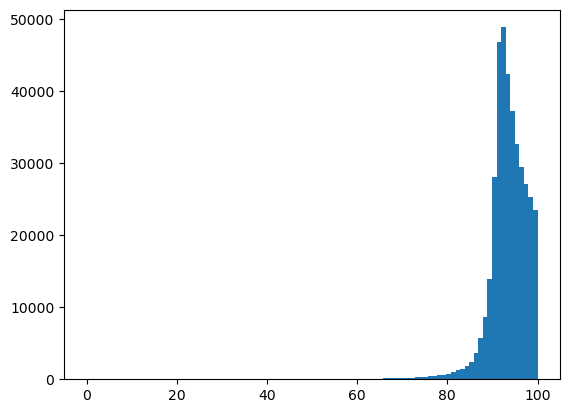

2268.604291001913

In [61]:
df['p34_E'] = sum_partons(df, 'E', [3,4])
df['p34_px'] = sum_partons(df, 'px', [3,4])
df['p34_py'] = sum_partons(df, 'py', [3,4])
df['p34_pz'] = sum_partons(df, 'pz', [3,4])
df['p34_m'] = np.sqrt(df['p34_E']**2 - df['p34_px']**2 - df['p34_py']**2 - df['p34_pz'])
plt.hist(df['p34_m'],bins=np.linspace(0,100,100))
plt.show()
np.min(df['p34_m'])
np.max(df['p34_m'])

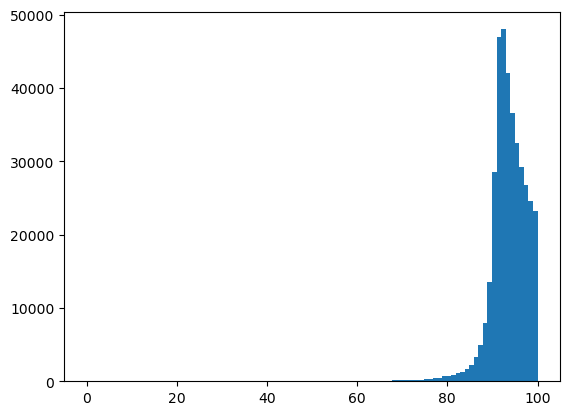

1748.9999600460737


In [62]:
df['p56_E'] = sum_partons(df, 'E', [5,6])
df['p56_px'] = sum_partons(df, 'px', [5,6])
df['p56_py'] = sum_partons(df, 'py', [5,6])
df['p56_pz'] = sum_partons(df, 'pz', [5,6])
df['p56_m'] = np.sqrt(df['p56_E']**2 - df['p56_px']**2 - df['p56_py']**2 - df['p56_pz'])
plt.hist(df['p56_m'],bins=np.linspace(0,100,100))
plt.show()

Now, we can (confidently) separate the higgs-squared term from higgs-plus-interference

/tmp/ipykernel_50828/1882984098.py:30: RuntimeWarning: invalid value encountered in divide
  ratio = events_vals / nplotter_vals
/tmp/ipykernel_50828/1882984098.py:31: RuntimeWarning: invalid value encountered in divide
  ax2.fill_between(nplotter_xcenters, (nplotter_vals-nplotter_errs)/nplotter_vals, (nplotter_vals+nplotter_errs)/nplotter_vals, step='mid', color='black', alpha=0.25)


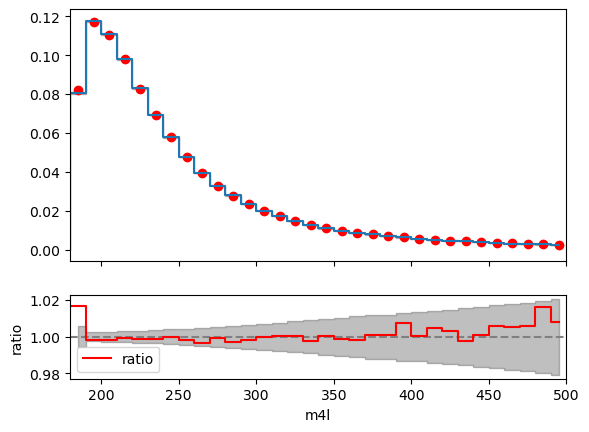

In [76]:
nplotter_txt_filepath = '/u/taepa/mcfm/MCFM-10.3/Bin/ggZZ_all_sm/ggZZ4l_lo_NNPDF31_nnlo_as_0118_1.00_1.00_125_ggZZ_all_sm_m3456.txt'
events_csv_filepath = '/u/taepa/mcfm/MCFM-10.3/Bin/ggZZ_all_sm/events.csv'

mcfm_xsec =  0.97002959

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [3, 1]})
plt.xlim(180,500)

# nplotter
nplotter_data = pd.read_csv(nplotter_txt_filepath, delim_whitespace=True, comment='#', names=['xmin', 'xmax', 'cross', 'numerror'])
nplotter_xmin = nplotter_data['xmin'].values
nplotter_xmax = nplotter_data['xmax'].values
nplotter_vals = nplotter_data['cross'].values
nplotter_errs = nplotter_data['numerror'].values
nplotter_xcenters = (nplotter_xmin + nplotter_xmax) / 2
nplotter_xbins = np.append(nplotter_xmin,nplotter_xmax[-1])
ax1.fill_between(nplotter_xcenters, nplotter_vals-nplotter_errs, nplotter_vals+nplotter_errs, step='mid', color='black', alpha=0.25)
ax1.step(nplotter_xcenters, nplotter_vals, where='mid', label='nplotter')

# events
events = pd.read_csv(events_csv_filepath)
events['m4l'] = np.sqrt(sum_partons(events, 'E')**2 - sum_partons(events,'px')**2- sum_partons(events,'py')**2 - sum_partons(events,'pz')**2)
# plot as markers
events_weights = events['wt'] / np.sum(events['wt']) * mcfm_xsec
events_vals, _ = np.histogram(events['m4l'], bins=nplotter_xbins, weights=events_weights)
ax1.scatter(nplotter_xcenters, events_vals, label='events', color='red', marker='o')

# ratio
ratio = events_vals / nplotter_vals
ax2.fill_between(nplotter_xcenters, (nplotter_vals-nplotter_errs)/nplotter_vals, (nplotter_vals+nplotter_errs)/nplotter_vals, step='mid', color='black', alpha=0.25)
ax2.axhline(1, color='gray', linestyle='--')
ax2.step(nplotter_xcenters, ratio, where='mid', color='red', label='ratio')
ax2.set_ylabel('ratio')
ax2.set_xlabel('m4l')

plt.legend()
plt.show()

Okay, so the agreement is close, but not perfect (when it was expected to be). Certainly well within MCFM uncertainty (except for first bin?). We should follow up with MCFM author why a discrepancy is occuring between MCFM-internal vs. third-party histogramming code.

In [ ]:
for proc, events in samples.items():
  events['4l_E'] = np.sum([events[f'p{i}_E'] for i in range(3,7)], axis=0)
  events['4l_px'] = np.sum([events[f'p{i}_px'] for i in range(3,7)], axis=0)
  events['4l_py'] = np.sum([events[f'p{i}_py'] for i in range(3,7)], axis=0)
  events['4l_pz'] = np.sum([events[f'p{i}_pz'] for i in range(3,7)], axis=0)
  events['4l_m'] = np.sqrt(events['4l_E']**2 - events['4l_px']**2 - events['4l_py']**2 - events['4l_pz']**2)

events_tot = samples['ggZZ_all']
events_bkg = samples['ggZZ_box']
events_hpi = samples['gghZZ_hpi']
events_int = samples['gghZZ_int']

m4l_bins = np.linspace(180,1000,120)
tot_entries, _ = np.histogram(events_tot['4l_m'], bins=m4l_bins, weights=events_tot['wt_norm'])
bkg_entries, _ = np.histogram(events_bkg['4l_m'], bins=m4l_bins, weights=events_bkg['wt_norm'])
hpi_entries, _ = np.histogram(events_hpi['4l_m'], bins=m4l_bins, weights=events_hpi['wt_norm'])
int_entries, _ = np.histogram(events_int['4l_m'], bins=m4l_bins, weights=events_int['wt_norm'])

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(10,8), sharex=True)

ax1.stairs(tot_entries, m4l_bins, color='black', label='$|\mathcal{M}_{ZZ} + \mathcal{M}_h|^2$')
ax1.stairs(bkg_entries, m4l_bins, color='blue', linestyle='dashed', label='$|\mathcal{M}_{ZZ}|^2$')
ax1.stairs(hpi_entries-int_entries, m4l_bins, color='green', linestyle='dashed', label='$|\mathcal{M}_h|^2$')
ax1.stairs(int_entries, m4l_bins, color='orange', linestyle='dashed', label='$2\mathrm{Re}(\mathcal{M}_{ZZ}^{\dag}\mathcal{M}_{h})$')
ax1.stairs(bkg_entries+hpi_entries, m4l_bins, color='red', linestyle='solid', label='$|\mathcal{M}_{ZZ}|^2 + |\mathcal{M}_h|^2 + 2\mathrm{Re}(\mathcal{M}_{ZZ}^{\dag}\mathcal{M}_{h})$')
ax1.legend()
ax1.set_xlim(180,1000)
# ax1.set_ylim(1e-5, np.max(bkg_entries)*2)

ax2.plot(m4l_bins, np.ones_like(m4l_bins), color='black', linestyle='-')
ax2.stairs((bkg_entries+hpi_entries) / tot_entries, m4l_bins, color='red', linestyle='solid')
ax2.set_xscale('log')
ax2.set_ylim(0.9,1.1)
ax2.set_ylabel('$\\frac{|\mathcal{M}_{ZZ}|^2 + |\mathcal{M}_h|^2 + 2\mathrm{Re}(\mathcal{M}_{ZZ}^{\dag}\mathcal{M}_{h})}{|\mathcal{M}_{ZZ} + \mathcal{M}_h|^2}$')
ax2.set_xlabel("$m_{4\ell}$ [GeV]")

plt.tight_layout()
plt.show()